In [1]:
!pip install deap

     ------------------------------------ 109.3/109.3 kB 421.4 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import warnings
warnings.filterwarnings("ignore")

# Ejercicio de la mochila

In [4]:
#Definir los pesos y beneficios como listas de python
beneficios = [50,35,45,20,35,40,50,50,45,40]
pesos = [20,25,20,20,35,40,35,30,35,25]
capacidad = 120

In [5]:
#Declarar el contenedor de operadores geneticos
toolbox = base.Toolbox()


In [7]:
#Crear la clase funcion de adaptabilidad y la clase individuo
creator.create("FitnessMax", base.Fitness, weights = (1.0, ))
creator.create("Individual", list, fitness = creator.FitnessMax)


In [9]:
# Construir los individuos
# Determinar el comportamiento del gen
toolbox.register("attribute", random.randint, 0,1)
# Determinar el tamaño del individuo
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n = 10)
#Determinar la forma de la poblacion
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# Confirmar individuo y poblacion

In [10]:
ind = toolbox.individual()
print("Individuo: ", ind)
pop = toolbox.population(n=6)
print("Poblacion: ", pop)

Individuo:  [1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
Poblacion:  [[1, 0, 0, 1, 1, 0, 0, 0, 1, 1], [0, 1, 1, 1, 1, 0, 0, 1, 1, 0], [0, 0, 1, 1, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 1, 1, 0, 0, 1, 0], [1, 0, 0, 1, 1, 1, 0, 1, 0, 0]]


# Crear la funcion de adaptabilidad

In [11]:
def evaluarBeneficio(individual):
    beneficio = 0.0
    peso = 0.0
    beneficio = np.dot(individual, beneficios)
    peso = np.dot(individual, pesos)

    if peso > capacidad:
        beneficio = beneficio - peso
    else:
        beneficio
    return beneficio,

# Confirmar la funcion de adaptabilidad


In [12]:
ind = toolbox.individual()
print("Individuo previo a evaluar")
print(ind)
print(ind.fitness.valid)
ind.fitness.values = evaluarBeneficio(ind)
print("Individuo evaluado")
print(ind)
print(ind.fitness.valid)
print(ind.fitness)


Individuo previo a evaluar
[0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
False
Individuo evaluado
[0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
True
(40.0,)


# Definir los operadores geneticos

In [13]:
# Seleccion
toolbox.register("select", tools.selTournament, tournsize = 3)
#Cruce
toolbox.register("mate", tools.cxOnePoint)
#Mutacion
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.2)
#Adaptabilidad
toolbox.register("evaluate", evaluarBeneficio)


# Configuracion de los estadisticos para analisis

In [15]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Promedio", np.mean)
stats.register("Desviacion estandar", np.std)
stats.register("Minimo", np.min)
stats.register("Maximo",np.max)

# Configurar la evolucion de las generaciones

In [24]:
#Inicializacion de la poblacion
population = toolbox.population(n = 512)
#Implementar el metodo evolutivo
population, logbook = algorithms.eaSimple(population, toolbox, cxpb = 0.8,
                                         mutpb = 0.2, ngen = 100,
                                         verbose = False, stats = stats)
print("El resultado de la evolucion es: ")
print(logbook)

print("La mejor solucion encontrada es: ")
print(tools.selBest(population,1)[0])

El resultado de la evolucion es: 
gen	nevals	Promedio	Desviacion estandar	Minimo	Maximo
0  	512   	94.6387 	43.0379            	15    	220   
1  	438   	115.957 	42.6864            	20    	220   
2  	435   	124.424 	45.1345            	0     	220   
3  	427   	135.84  	45.7925            	25    	220   
4  	442   	142.5   	45.1138            	40    	220   
5  	423   	147.344 	46.7433            	35    	220   
6  	429   	156.416 	47.5298            	35    	220   
7  	430   	165.352 	46.144             	40    	220   
8  	435   	164.854 	48.5365            	0     	220   
9  	430   	176.26  	48.5133            	45    	220   
10 	439   	188.125 	46.849             	0     	220   
11 	427   	197.578 	43.2933            	40    	220   
12 	447   	201.318 	40.6355            	45    	220   
13 	432   	203.076 	40.433             	70    	220   
14 	430   	202.119 	39.45              	75    	220   
15 	437   	204.287 	39.5091            	40    	220   
16 	428   	203.32  	40.3223            	45    	2

# Grafico de la evolucion del algoritmo

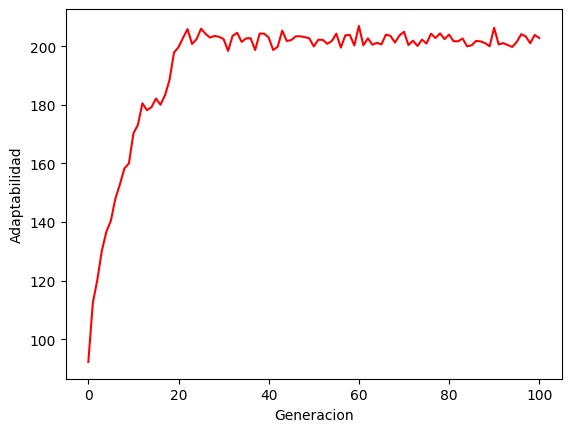

In [21]:
gen = logbook.select("gen")
avgs = logbook.select("Promedio")
fig = plt.figure()
ax = plt.gca()
line = ax.plot(gen, avgs,"r-",label = "Adaptabilidad Promedio")
ax.set_xlabel("Generacion")
ax.set_ylabel("Adaptabilidad")
plt.show()

In [23]:
best = tools.selBest(population,1)[0]
evaluarBeneficio(best)

(220,)